## 目標網頁：
https://twpat1.tipo.gov.tw/twpatc/twpatkm?@@0.4001568517886145

搜尋並且爬取鴻海關係企業共25間之專利資料

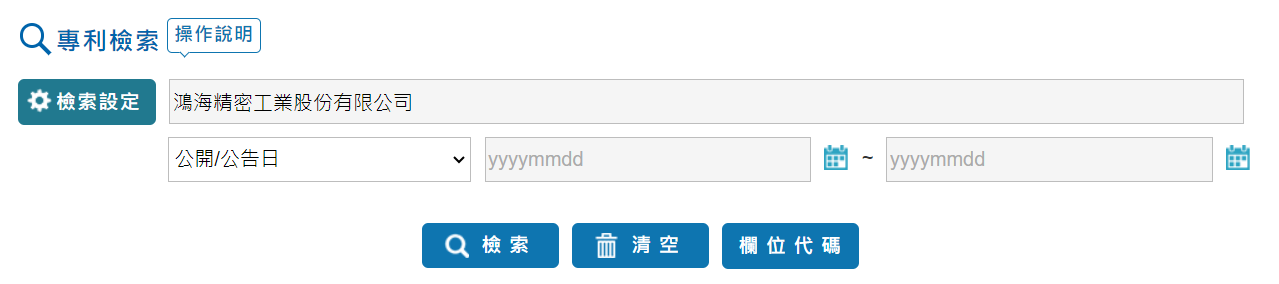

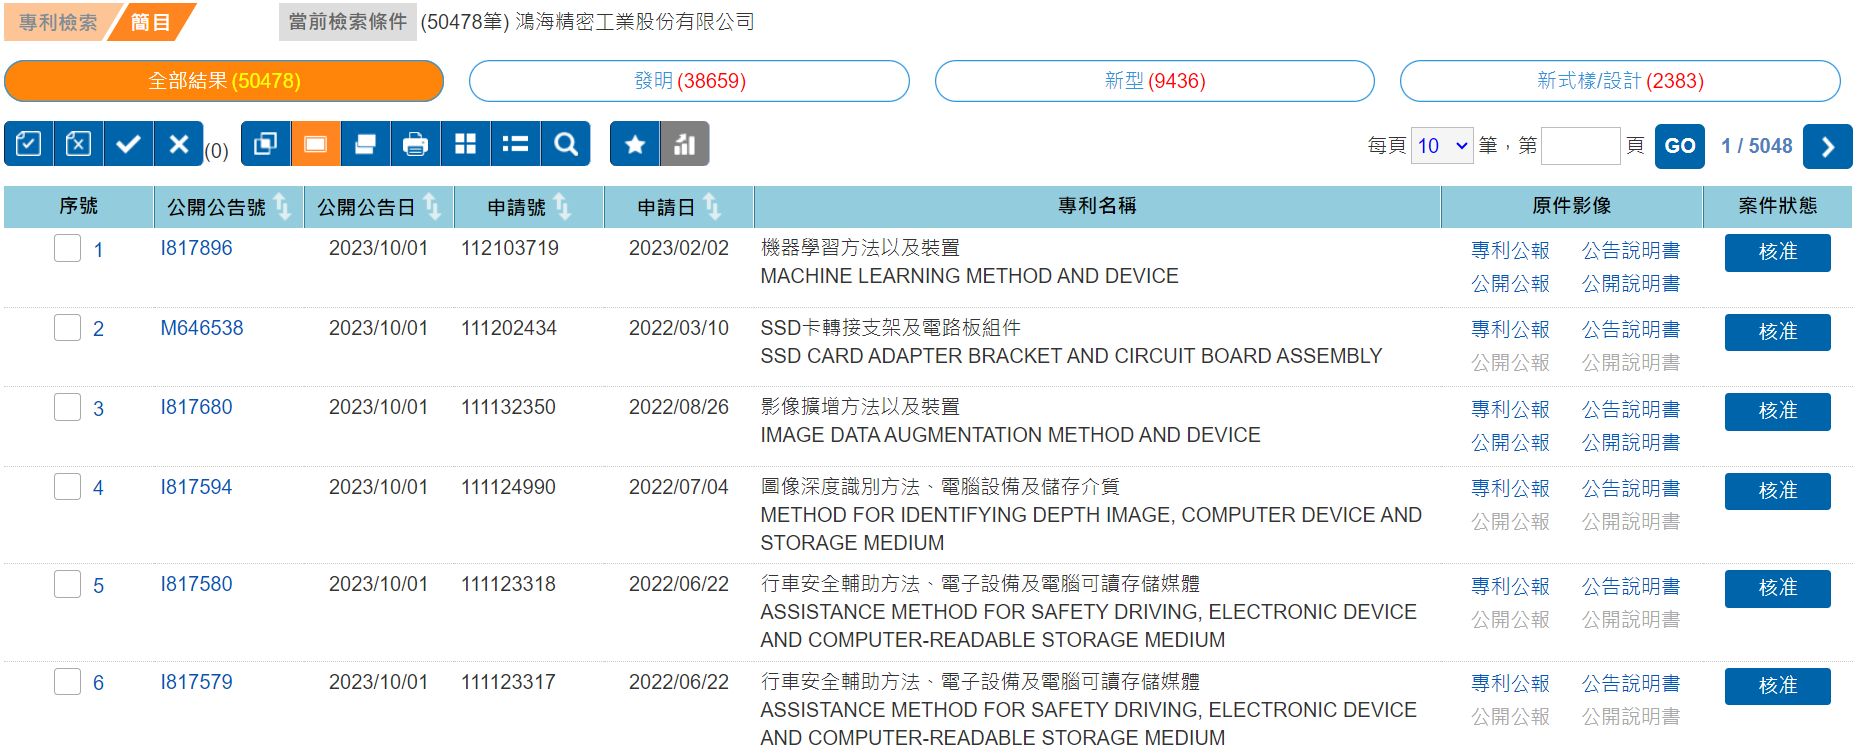

## 輸出結果：
* 鴻海關係企業專利資料
    * 企業編號（25間企業之編號）
    * 企業名稱
    * 公開公告號
    * 公開公告日
    * 申請日
    * 專利名稱
    * 案件狀態

## 程式語法：

In [1]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium import webdriver
import time
import pandas as pd

df = pd.read_excel("鴻家軍input.xlsx")

# date: 2022/11/7

In [2]:
# 確認鴻海關係企業名單

df['企業']

0               正崴精密工業股份有限公司
1                 廣宇科技股份有限公司
2               鴻準精密工業股份有限公司
3               永崴投資控股股份有限公司
4                 森崴能源股份有限公司
5               碩禾電子材料股份有限公司
6                 榮炭科技股份有限公司
7                 群創光電股份有限公司
8                 陽程科技股份有限公司
9                 松上電子股份有限公司
10              榮創能源科技股份有限公司
11                     乙盛-KY
12                    GIS-KY
13                      樺漢科技
14              正達國際光電股份有限公司
15                台揚科技股份有限公司
16                建漢科技股份有限公司
17                瑞祺電通股份有限公司
18    英屬開曼群島商訊芯科技股份有限公司台灣分公司
19                天鈺科技股份有限公司
20              京鼎精密科技股份有限公司
21              帆宣系統科技股份有限公司
22                台康生技股份有限公司
23                中揚光電股份有限公司
24              鴻海精密工業股份有限公司
Name: 企業, dtype: object

In [1]:
driver = webdriver.Chrome(ChromeDriverManager().install())
enterprise_patents = {}
count = 1


def search_enterprise(enterprise):
    global driver, enterprise_patents, count
    
    driver.get(f"https://twpat1.tipo.gov.tw/twpatc/twpatkm?@@0.4001568517886145")
    time.sleep(1)
    
    # search and send
    company = driver.find_element(By.XPATH, '//*[@class="intext"]')                    
    company.send_keys(enterprise)
    company.send_keys(Keys.ENTER)
    time.sleep(5)
    
    while True:
        try:    
            data_elements = driver.find_elements(By.XPATH, '//*[@class="sumtr1"]')

            for data_element in data_elements:
                print(data_element)

                enterprise_patents[data_element.find_element(By.CLASS_NAME, 'sumtd2_PN').text] = {
                    'index': count,
                    '企業': enterprise,
                    '公開公告日': data_element.find_element(By.CLASS_NAME, 'sumtd2_ID').text,
                    '申請日': data_element.find_element(By.CLASS_NAME, 'sumtd2_AD').text,
                    '專利名稱': data_element.find_element(By.CLASS_NAME, 'sumtd2_TI').text,
                    '案件狀態': data_element.find_element(By.CLASS_NAME, 'sumtd2_LS').text
                }

            next_page = driver.find_elements(By.XPATH, '//*[@class="next_pg"]')

            try:
                next_page[0].find_element(By.XPATH, 'input').click()
                time.sleep(1)

            except:
                break
                
        except:
            break
                
    count +=1

for enterprise in df['企業']:
    search_enterprise(enterprise)

In [11]:
result_index = []
result_enter = []
result_case = []
result_id = []
result_ad = []
result_ti = []
result_ls = []

for link, datas in enterprise_patents.items():
    result_index.append(datas['index'])
    result_enter.append(datas['企業'])
    result_case.append(link)
    result_id.append(datas['公開公告日'])
    result_ad.append(datas['申請日'])
    result_ti.append(datas['專利名稱'])
    result_ls.append(datas['案件狀態'])
    
    
result = pd.DataFrame({'企業編號': result_index, '企業名稱': result_enter, '公開公告號': result_case, 
                      '公開公告日':result_id, '申請日': result_ad,'專利名稱':result_ti,'案件狀態':result_ls})
display(result)

,企業編號,企業名稱,公開公告號,公開公告日,申請日,專利名稱,案件狀態
0,1,正崴精密工業股份有限公司,M633219,2022/10/11,2022/07/14,交流電源連接器\nAC POWER CONNECTOR,核准
1,1,正崴精密工業股份有限公司,M633133,2022/10/11,2022/06/14,電連接器\nELECTRICAL CONNECTOR,核准
2,1,正崴精密工業股份有限公司,M633128,2022/10/11,2022/06/13,電連接器及其耐腐蝕性端子\nELECTRICAL CONNECTOR AND CORROSI...,核准
3,1,正崴精密工業股份有限公司,M633010,2022/10/11,2022/04/11,充電連接器\nCHARGING CONNECTOR,核准
4,1,正崴精密工業股份有限公司,M632333,2022/09/21,2022/06/01,電連接器\nELECTRICAL CONNECTOR,核准
...,...,...,...,...,...,...,...
27609,25,鴻海精密工業股份有限公司,M319520,2007/09/21,2007/03/19,CMOS清除電路\nCLEAR CIRCUIT FOR CMOS,消滅
27610,25,鴻海精密工業股份有限公司,M319457,2007/09/21,2007/03/05,電腦測試裝置\nDEVICE FOR TESTING COMPUTER,消滅
27611,25,鴻海精密工業股份有限公司,M319448,2007/09/21,2007/03/12,電腦系統\nCOMPUTER SYSTEM,消滅
27612,25,鴻海精密工業股份有限公司,M319436,2007/09/21,2007/01/15,電腦裝置\nCOMPUTER APPARATUS,消滅


In [53]:
result.to_csv('20231107鴻海關係企業專利.csv', encoding='utf_8_sig', index=False)